# Tutorial 3: Visualizing inference results

This tutorial goes over the MCSPACE utilities for visualizing inference results. 

The tutorial uses inference results from the previous tutorial. These are saved here in the `./results_tutorial/` folder so that this tutorial can be run i

In [17]:
from pathlib import Path
import pandas as pd
from mcspace.utils import pickle_load
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
%matplotlib inline 

The functions `render_assemblages`, `render_assemblage_proportions`, and `export_association_networks_to_cytoscape` provide model visualization utilities and are imported as follows:

In [19]:
from mcspace.visualization import render_assemblages, render_assemblage_proportions, export_association_networks_to_cytoscape

# Paths

Relative paths for this tutorial. `basepath` gives the path of this file

In [22]:
basepath = Path("./")
resultspath = basepath / "results_tutorial"
outpath = basepath / "figures"
outpath.mkdir(exist_ok=True, parents=True)

In [23]:
treefile = basepath / "data" / "newick_tree_query_reads.nhx"

# Load results

Load inference results from pickle file to be used in visualization methods

In [24]:
results = pickle_load(resultspath / "results.pkl")

In [25]:
results.keys()

dict_keys(['assemblages', 'assemblage_proportions', 'perturbation_bayes_factors', 'relative_abundances'])

# Visualize results

## Visualizing assemblages

We visualize assemblages with the function `render_assemblages` as described below:

### render_assemblages:
**Required arguments**
- `results`: The first required argument is the results given from performing model inference.
- `outfile`: Filename to which to save the resulting figure.

**Optional keyword arguments**:
- `otu_threshold`: Filtering threshold below which to exclude OTUs in assemblages. Default value is 0.05.
- `treefile`: Filename of Newick formatted phylogenetic tree for OTUs in study. If not provided, assemblages are plotted without the tree.
- `fontsize`: Fontsize for text in figure. Default value is 6.
- `legend`: Specifies whether to include figure legend. Default value is True.

**Returns**:
- `ax_tree`: Axis object for phylogenetic tree.
- `ax_theta`: Axis object for assemblage heatmap.
- `ax_cbar`: Axis object for legend colorbar.

Providing the minimum arugments, we generate a heatmap of model inferred assemblages, with each OTU specified to its lowest resolved taxoomic level and a default filtering threshold of 0.05.

(None,
 <Axes: xlabel='Assemblage', ylabel='OTU'>,
 <matplotlib.colorbar.Colorbar at 0x1eb2c6f90f0>)

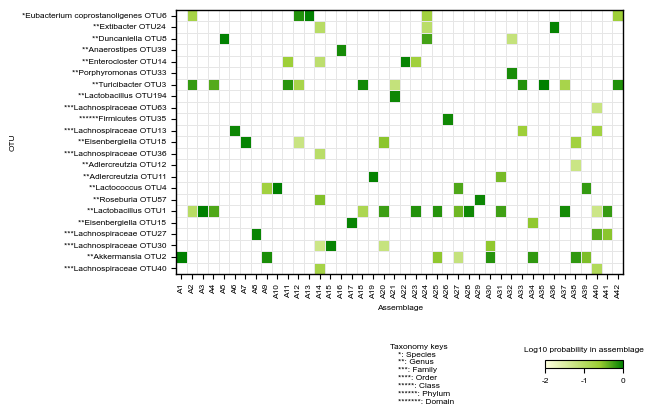

In [36]:
render_assemblages(results,
                  outpath / "assemblages.pdf")

We can change the OTU threhold to 0.01 to include more taxa which may be at lower abundance.

(None,
 <Axes: xlabel='Assemblage', ylabel='OTU'>,
 <matplotlib.colorbar.Colorbar at 0x1eb2d0782e0>)

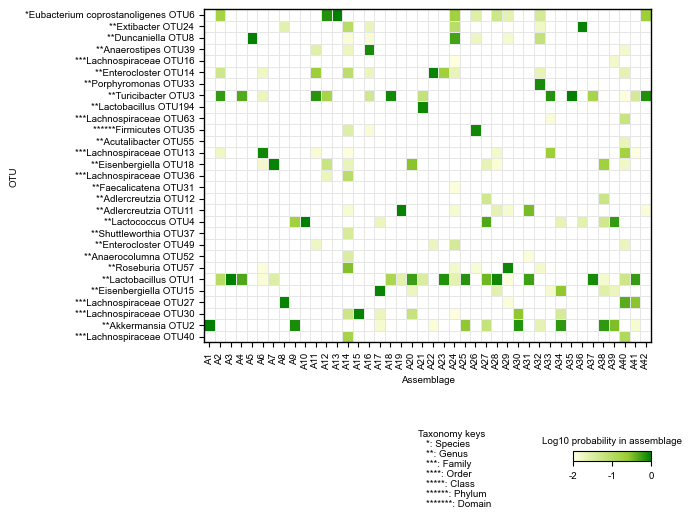

In [39]:
render_assemblages(results,
                  outpath / "assemblages.pdf",
                  fontsize=7,
                  otu_threshold=0.01)

By providing the phylogenetic tree file, we can visualize each assemblage on a phylogenetic tree.

original tree size: 1406
pruned tree size: 23


(<Axes: >,
 <Axes: xlabel='Assemblage'>,
 <matplotlib.colorbar.Colorbar at 0x1eb2924c730>)

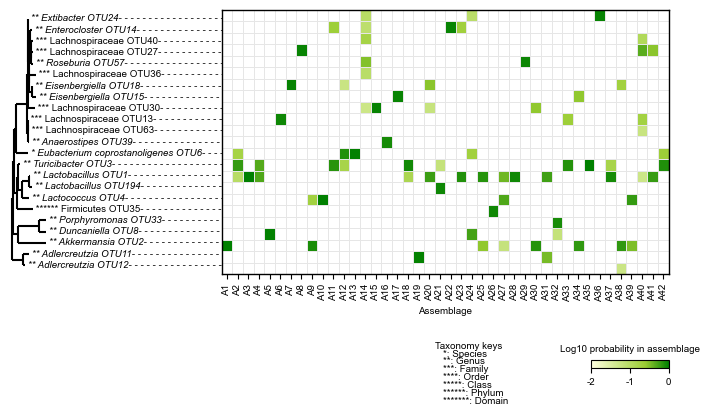

In [29]:
render_assemblages(results,
                  outpath / "assemblages.pdf",
                  treefile=treefile,
                   fontsize=7)

## Visualizing assemblage proportions

We visualize assemblage proportions using the `render_assemblage_proportions` function as decribed below:

### render_assemblage_proportions:
**Required parameters**:
- `results`: The first required argument is the results given from performing model inference.
- `outfile`: Filename to which to save the resulting figure.

**Optional keyword arguments**:
- `average_subjects`: Specifies whether to average assemblage proportions over subjects and display only the subject averaged values for each timepoint. Default value is False.
- `annotate_bayes_factors`: Specifies whether to display perturbation Bayes factors, if perturbations are included in the study. Default value is False.
- `logscale`: Specifies whether to use a logscale for assemblage proportions. Default value is True. Providing the value False will plot proportions on a linear scale.
- `beta_vmin`: Minimum value for heatmap. If using logscale, corresponds to power of 10. Default value is -3, corresponding to 0.001.
- fontsize=6,
- `fontsize`: Fontsize for text in figure. Default value is 6.
- `legend`: Specifies whether to include figure legend. Default value is True.

**Returns**:
- `ax`: Array of axis objects for heatmap for each timepoint if plotting all subjects. If averaging subjects, the axis consists of just a single object for the heatmap.
- `ax_cbar`: Axis object for legend colorbar.
- `ax_bf`: Axis object for Bayes Factor legend.

Providing the mimimum set of arguments plots assemblage proportions for each subject in the study at each timepoint.

c:\users\gary\documents\projects\mcspace_final\mcspace\mcspace\visualization.py:295: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cbar.ax.set_xticklabels(ax_cbar.ax.get_xticklabels(), fontsize=fontsize)


([<Axes: ylabel='Time: 35'>,
  <Axes: ylabel='Time: 43'>,
  <Axes: xlabel='Assemblage', ylabel='Time: 57'>],
 None)

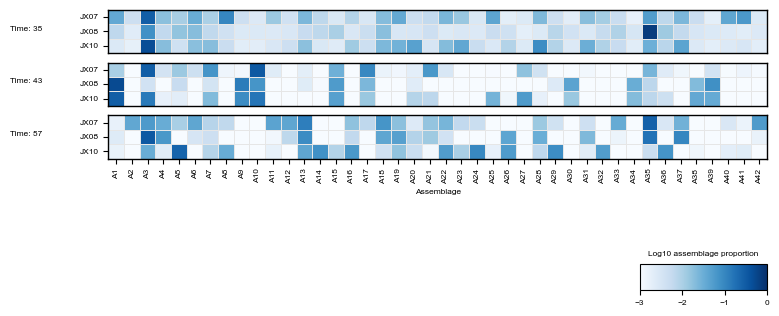

In [41]:
render_assemblage_proportions(results,
                              outpath / "proportions.pdf")

Setting the `annotate_bayes_factors` parameter to True displays inferred Bayes factors

c:\users\gary\documents\projects\mcspace_final\mcspace\mcspace\visualization.py:295: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cbar.ax.set_xticklabels(ax_cbar.ax.get_xticklabels(), fontsize=fontsize)
C:\Users\Gary\anaconda3\envs\mcspace\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Gary\anaconda3\envs\mcspace\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


([<Axes: ylabel='Time: 35'>,
  <Axes: ylabel='Time: 43'>,
  <Axes: xlabel='Assemblage', ylabel='Time: 57'>],
 <Axes: title={'center': 'Bayes factor'}>)

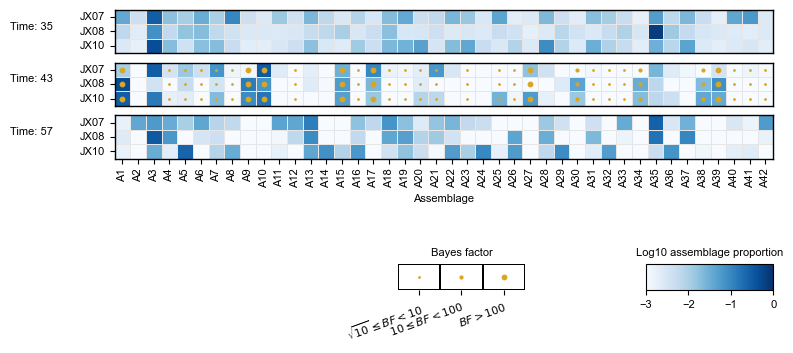

In [43]:
render_assemblage_proportions(results,
                              outpath / "proportions.pdf",
                              annotate_bayes_factors=True,
                              fontsize=8)

Setting the `average_subjects` parameter to True averages assemblage proportions over subjects and plots just the timeseries.

c:\users\gary\documents\projects\mcspace_final\mcspace\mcspace\visualization.py:295: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_cbar.ax.set_xticklabels(ax_cbar.ax.get_xticklabels(), fontsize=fontsize)
C:\Users\Gary\anaconda3\envs\mcspace\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Gary\anaconda3\envs\mcspace\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


([<Axes: xlabel='Assemblage', ylabel='Time'>],
 <Axes: title={'center': 'Bayes factor'}>)

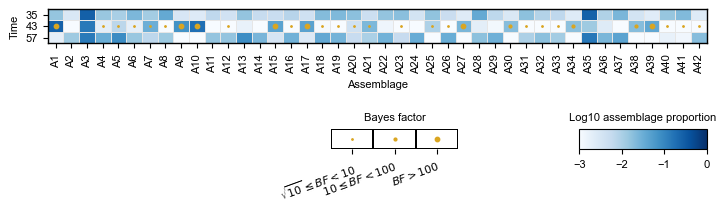

In [44]:
render_assemblage_proportions(results,
                              outpath / "proportions.pdf",
                              average_subjects=True,
                              annotate_bayes_factors=True,
                              fontsize=8)

## Exporting association networks for cytoscape

Additionally, we can visualize networks of associated taxa for a specified taxon, and how associations change over time.

The function `export_association_networks_to_cytoscape` exports association networks over time, for a specified taxon to an xml file which can be interactively explored in cytoscape. The function is described below:

### export_association_networks_to_cytoscape
**Required arguments**:
- `Otu_ID`: The first required argument takes the Otu name for hub taxon for which to export association networks. 
- `results`: The second required argument is the results given from performing model inference.
- `outfile`: The third required argument takes the filename to which to export the association networks to.

**Optional keyword arguments**:
- `ra_threshold`: Relative abundance threshold for which taxa to include in network. Taxa with a relative abundance below the specified threshold at all timepoints in the study will be excluded. Default value is 0.01.
- `edge_threshold`: Association score threshold for excluding taxa from the network. Taxa with an association score less than the specified value on all timepoints will be excluded. Default value is 0.01.

For example, to export networks for **OTU2 Akkermansia**, to the file **akkermansia_associations.xml** we execute the following command:

In [45]:
export_association_networks_to_cytoscape("Otu2",
                                         results,
                                         outpath/"akkermansia_associations.xml")

When opened with cytoscape, node attributes for each timepoint correspond to each OTUs relative abundance at that time point. Edge attributes at each time point correspond to the association score between each pair of given taxa.